In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
!pip install word2number
from word2number import w2n

In [9]:
dg=pd.read_csv("/content/hiring.csv")
dg

,experience,test_score_out_of10,interview_score_out_of10,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [10]:
dg.experience=dg.experience.fillna("zero")
dg

,experience,test_score_out_of10,interview_score_out_of10,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [11]:
dg.experience = dg.experience.apply(w2n.word_to_num)
dg

,experience,test_score_out_of10,interview_score_out_of10,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [13]:
dg.test_score_out_of10.median()

8.0

In [32]:
import math
median_test_score_out_of10 = math.floor(dg.test_score_out_of10.mean())
median_test_score_out_of10

7

In [33]:
dg.test_score_out_of10=dg.test_score_out_of10.fillna(median_test_score_out_of10)
dg

,experience,test_score_out_of10,interview_score_out_of10,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [34]:
reg = linear_model.LinearRegression()
reg.fit(dg[['experience','test_score_out_of10','interview_score_out_of10']],dg.salary)

LinearRegression()

In [36]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [37]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

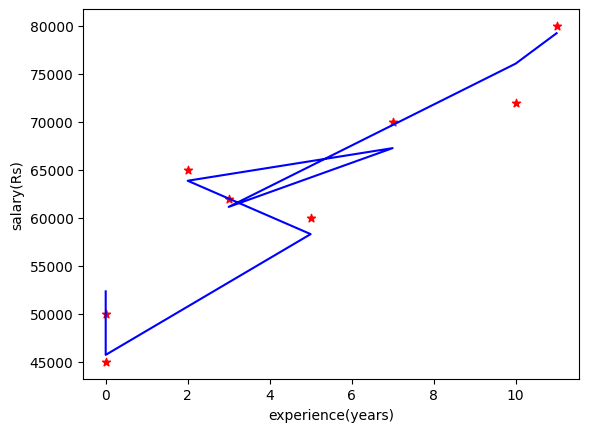

In [38]:
%matplotlib inline
plt.xlabel('experience(years)')
plt.ylabel('salary(Rs)')
plt.scatter(dg.experience,dg.salary, color='red',marker='*')
plt.plot(dg.experience,reg.predict(dg[['experience','test_score_out_of10','interview_score_out_of10']]),color='blue')

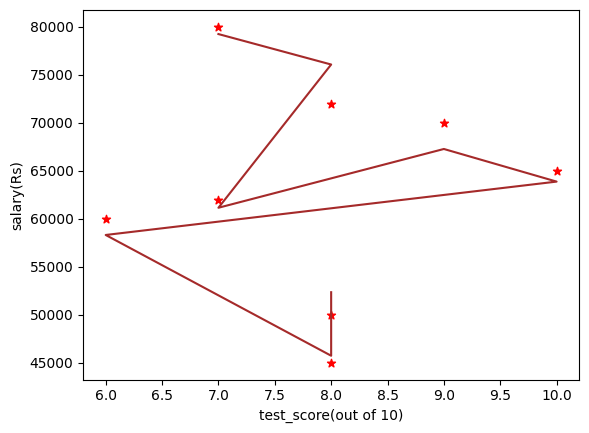

In [39]:
%matplotlib inline
plt.xlabel('test_score(out of 10)')
plt.ylabel('salary(Rs)')
plt.scatter(dg.test_score_out_of10,dg.salary, color='red',marker='*')
plt.plot(dg.test_score_out_of10,reg.predict(dg[['experience','test_score_out_of10','interview_score_out_of10']]),color='brown')

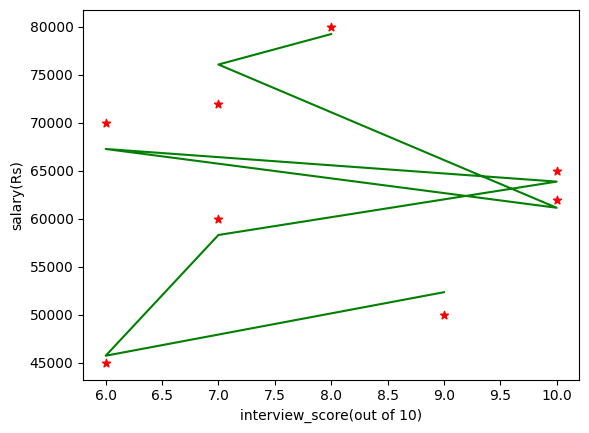

In [40]:
%matplotlib inline
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary(Rs)')
plt.scatter(dg.interview_score_out_of10,dg.salary, color='red',marker='*')
plt.plot(dg.interview_score_out_of10,reg.predict(dg[['experience','test_score_out_of10','interview_score_out_of10']]),color='green')